In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)

from sklearn.metrics import rand_score, adjusted_rand_score

Text(0, 0.5, 'PC2')

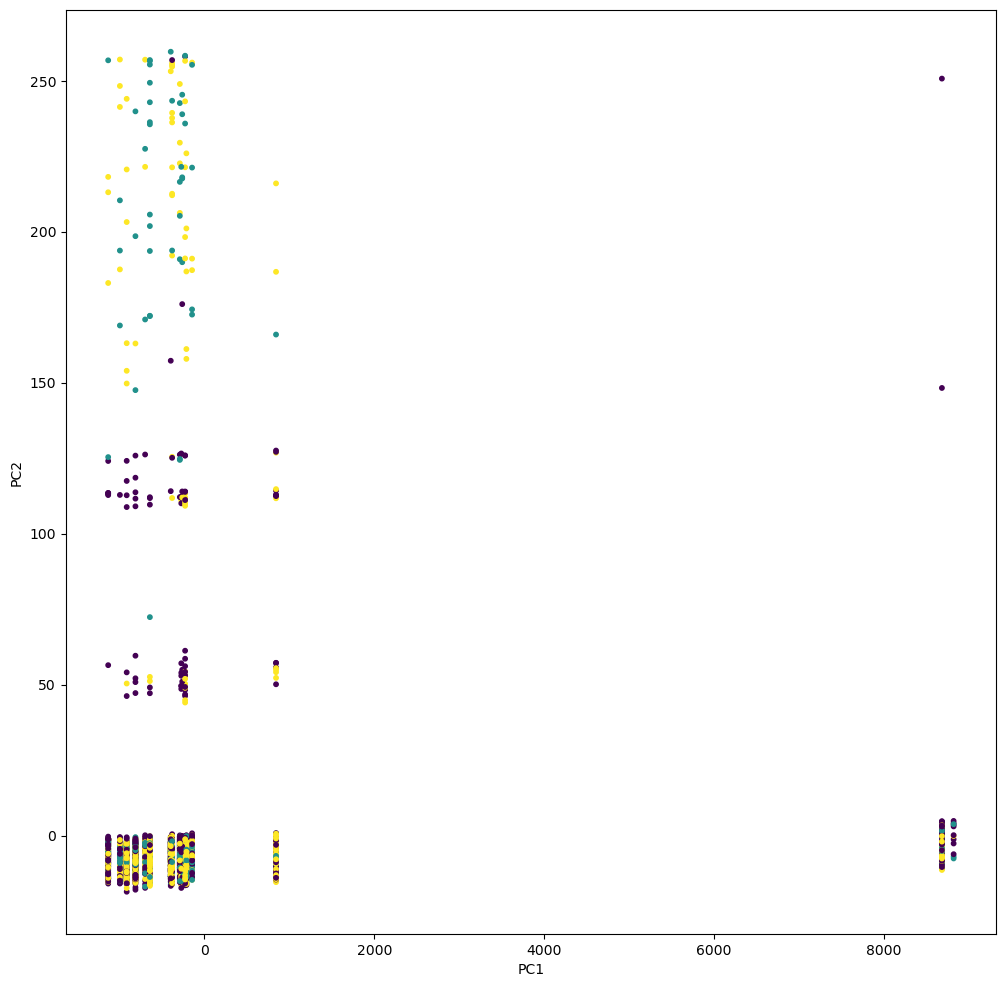

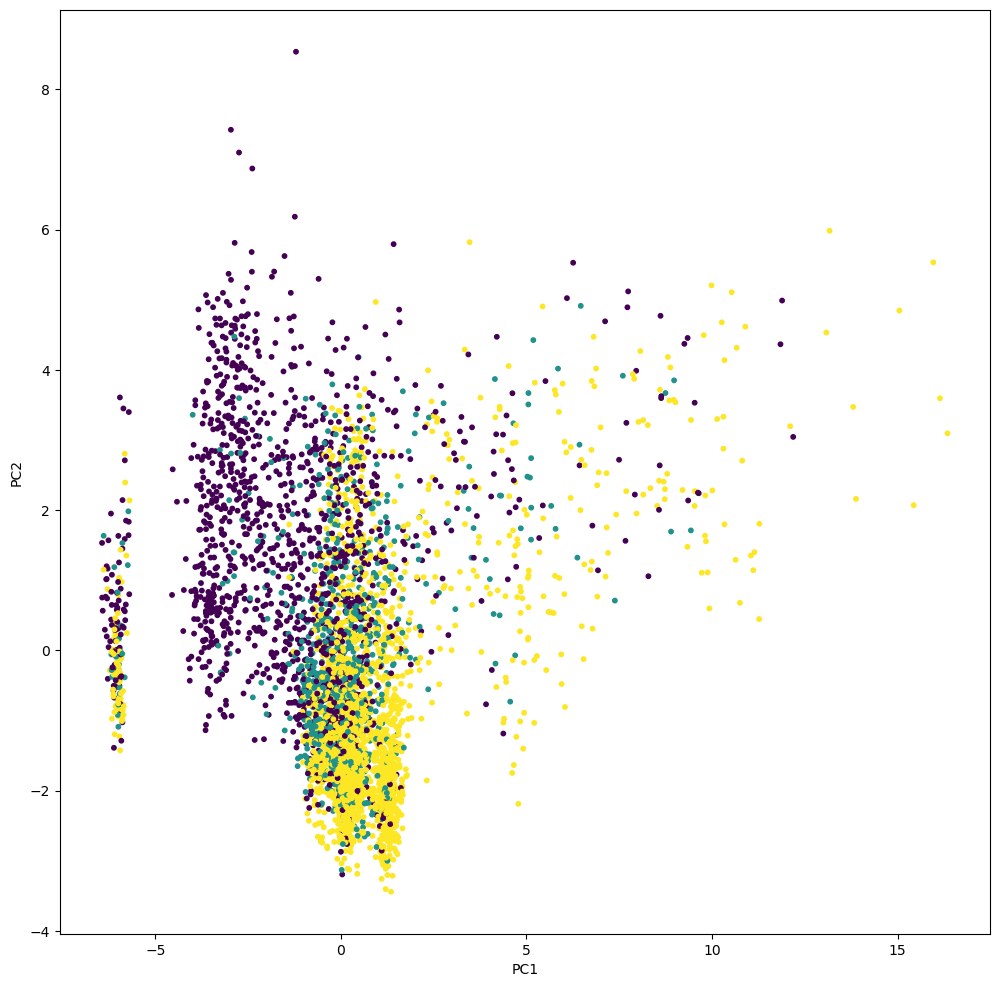

In [6]:
data = pd.read_csv('data.csv', sep=';')
data.value_counts('Target')

X = data.drop('Target', axis=1)
scaler = StandardScaler(with_std=True,
                        with_mean=True)
data_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X)
scores = pca.transform(X)

label2number = {'Dropout': 1, 'Enrolled': 2, 'Graduate': 3}
colors = [label2number[s] for s in data['Target']]

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(scores[:,0], scores[:,1], s=10, c=colors)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

pca.fit(data_scaled)
scores = pca.transform(data_scaled)

label2number = {'Dropout': 1, 'Enrolled': 2, 'Graduate': 3}
colors = [label2number[s] for s in data['Target']]

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(scores[:,0], scores[:,1], s=10, c=colors)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))



#### The non-standartized PCA Analysis visualization seems to be useless due to points being too close to each other to discern any differences.

Rand index: 0.5570
Adjusted Rand index: 0.1517
Rand index: 0.6189
Adjusted Rand index: 0.0451
Rand index: 0.6177
Adjusted Rand index: 0.0268
Rand index: 0.6177
Adjusted Rand index: 0.0197
Rand index: 0.6171
Adjusted Rand index: 0.0151
Rand index: 0.6168
Adjusted Rand index: 0.0123
Rand index: 0.6167
Adjusted Rand index: 0.0108


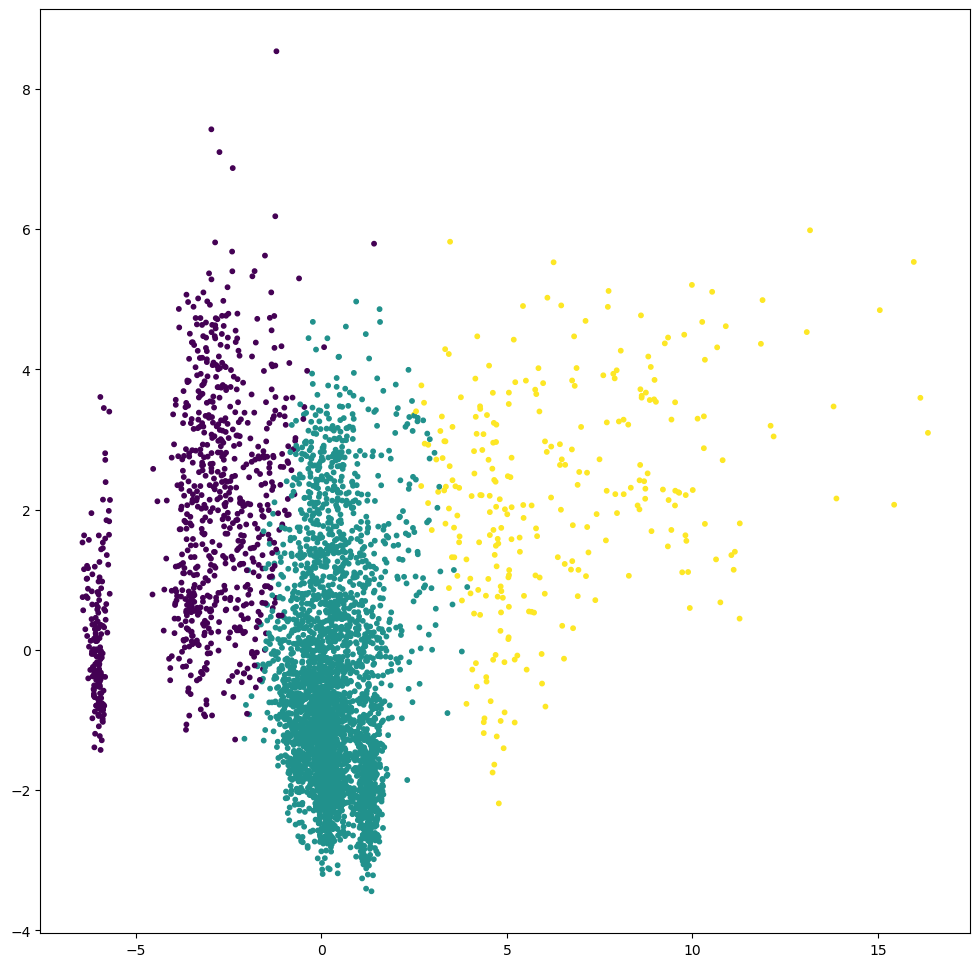

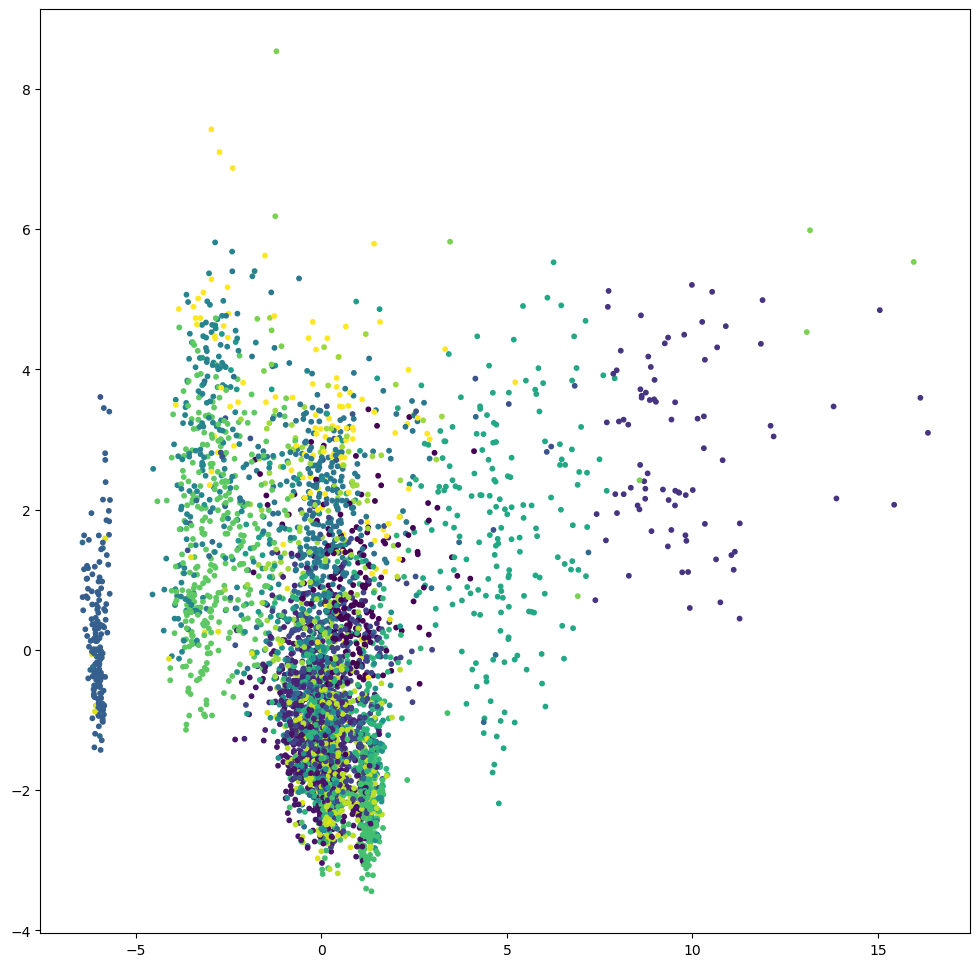

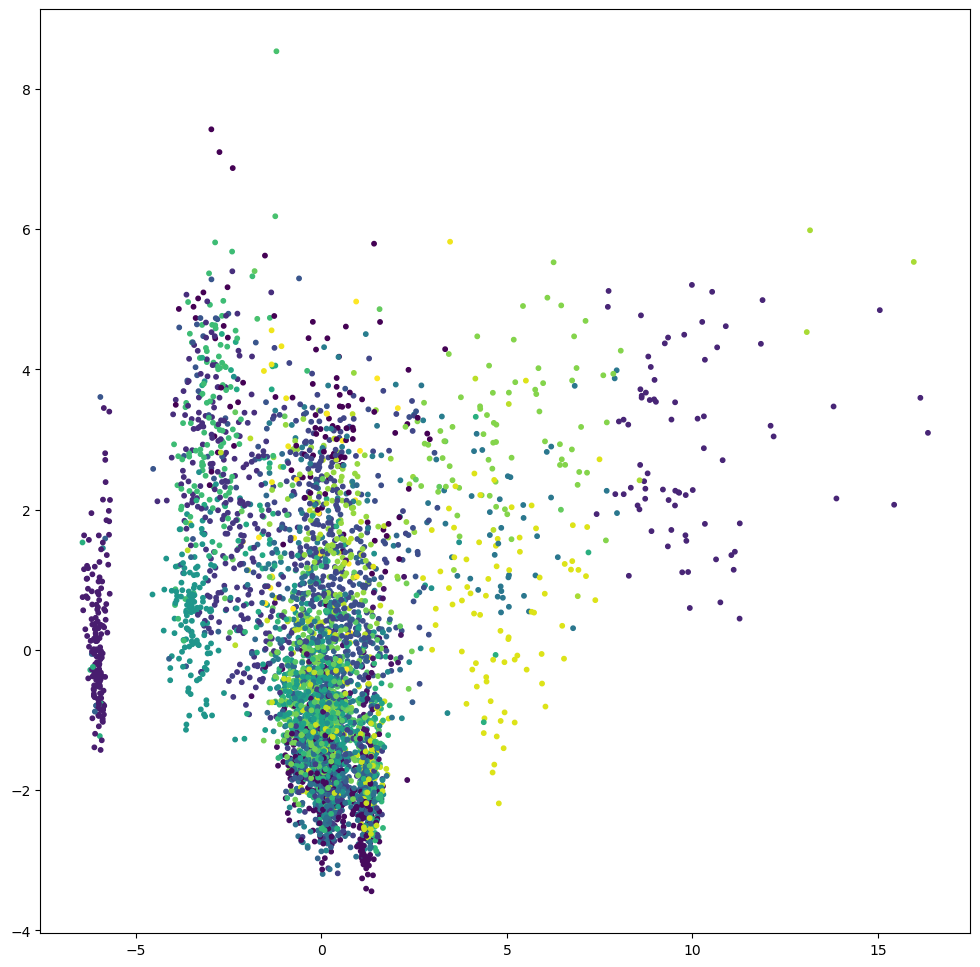

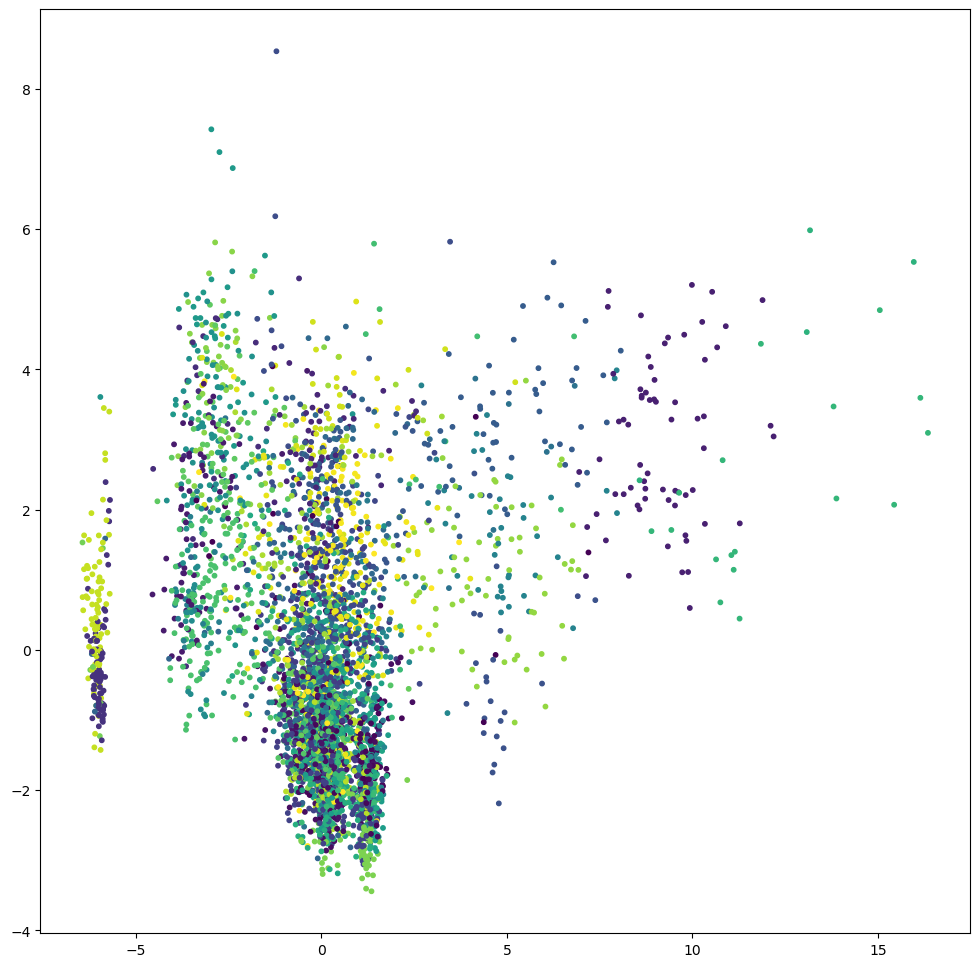

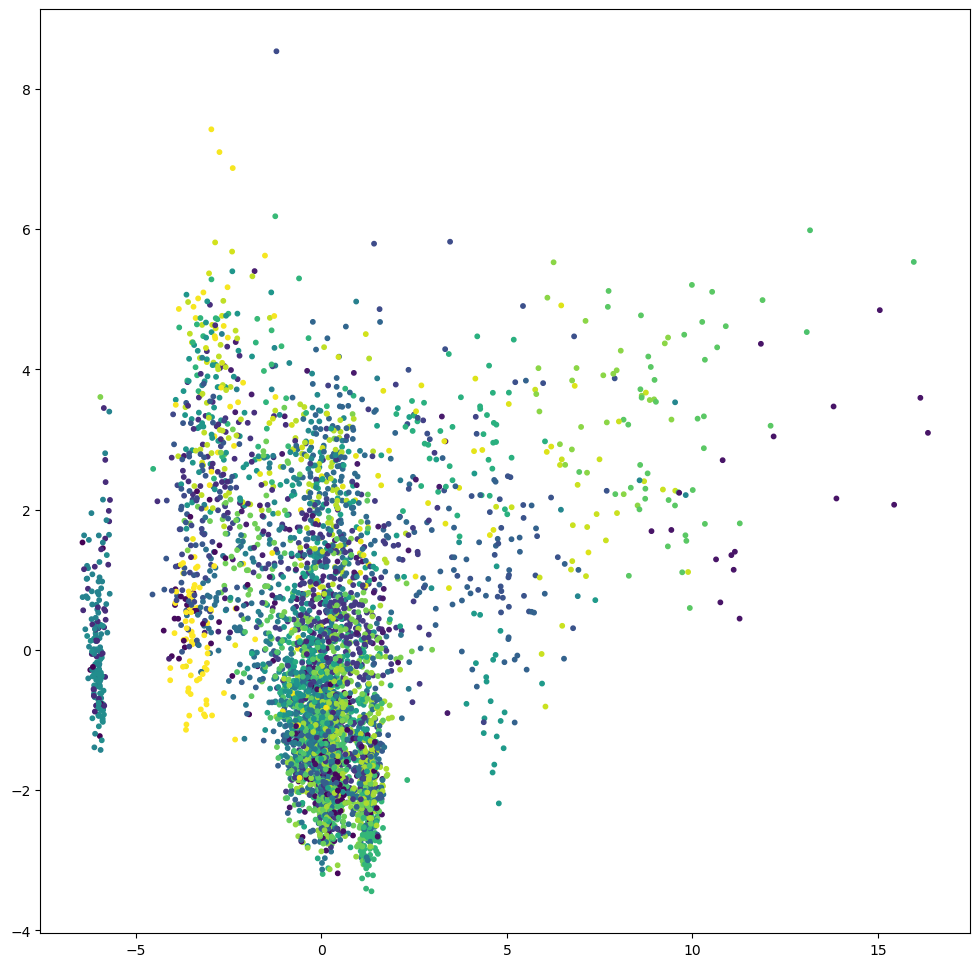

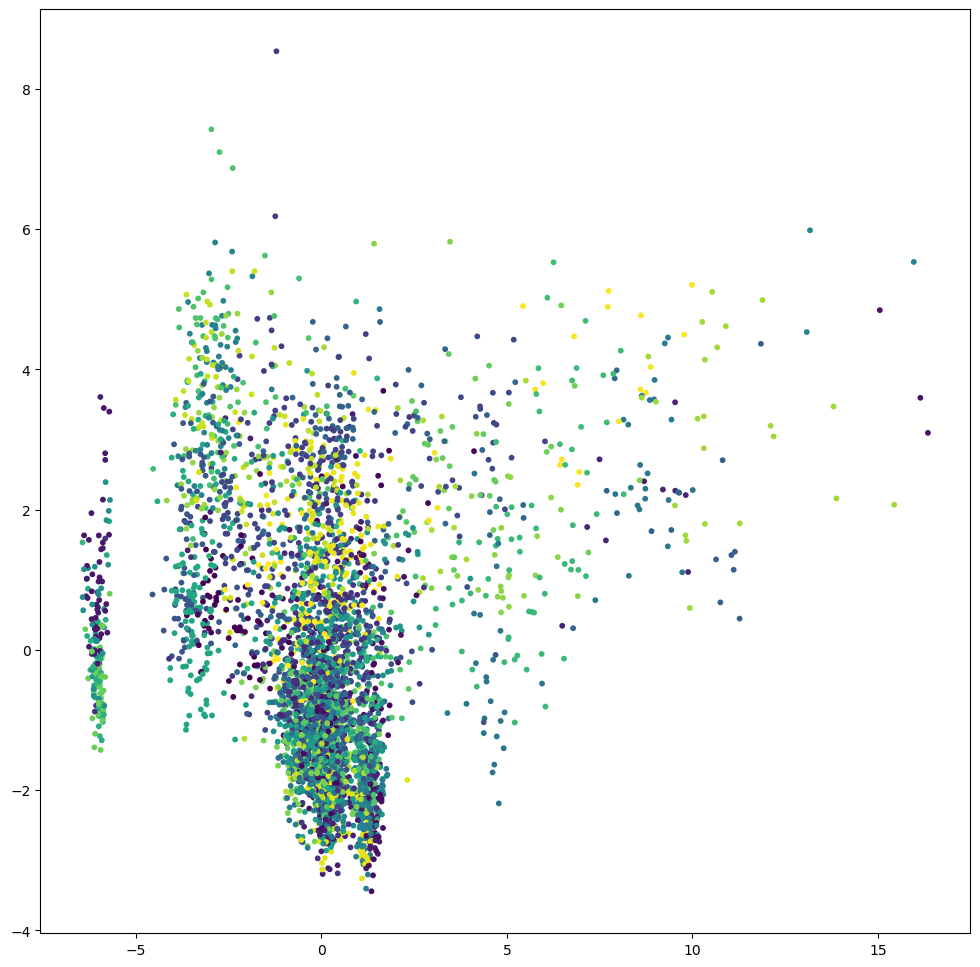

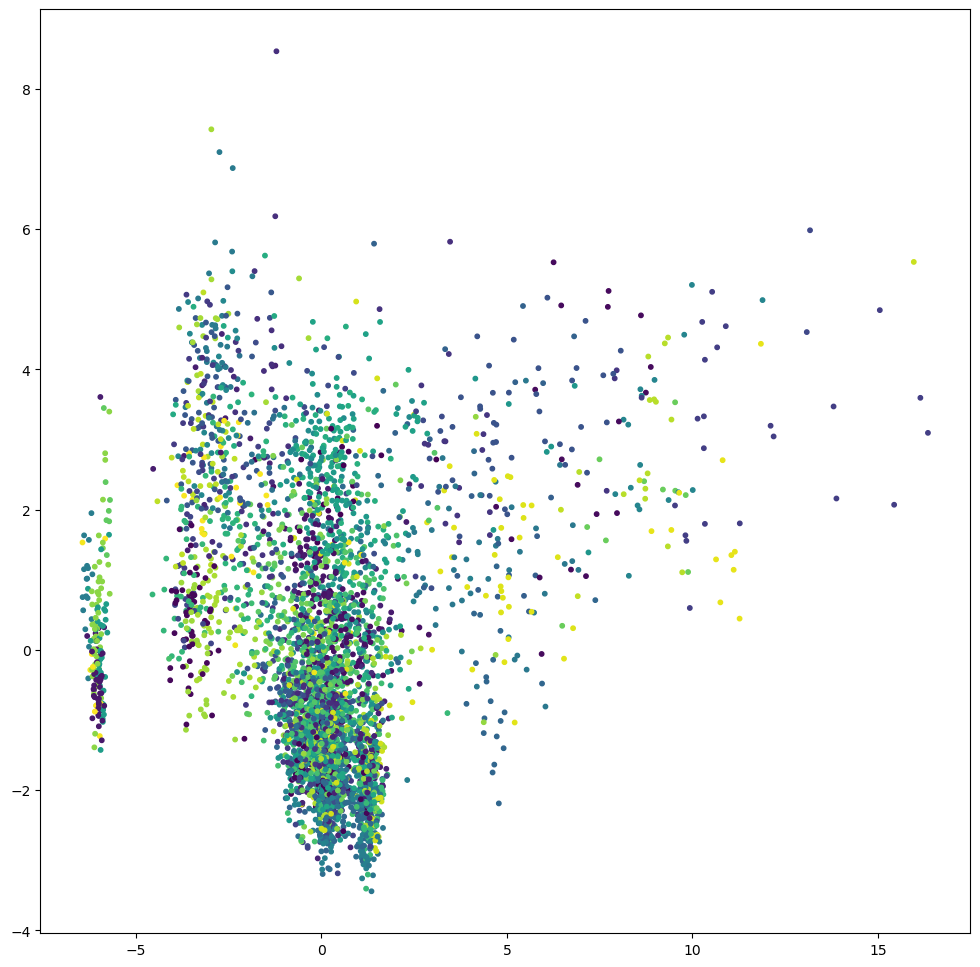

In [10]:
samples = [i for i in range (3, 112, 18)]
for i in samples:
    kmeans = KMeans(n_clusters=i, n_init=20).fit(data_scaled)
    i, j = 0, 1 # which components
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.scatter(scores[:,0], scores[:,1], s=10, c=kmeans.labels_)
    print('Rand index: %.4f' % rand_score(data['Target'],kmeans.labels_))
    print('Adjusted Rand index: %.4f' % adjusted_rand_score(data['Target'],kmeans.labels_))


#### According to adjusted random index, the least randomly chosen points are in clustering attempt #2, which has 18 clusters.

Best result:
Metric: euclidean, Linkage: ward, Adjusted Rand Index: 0.0301


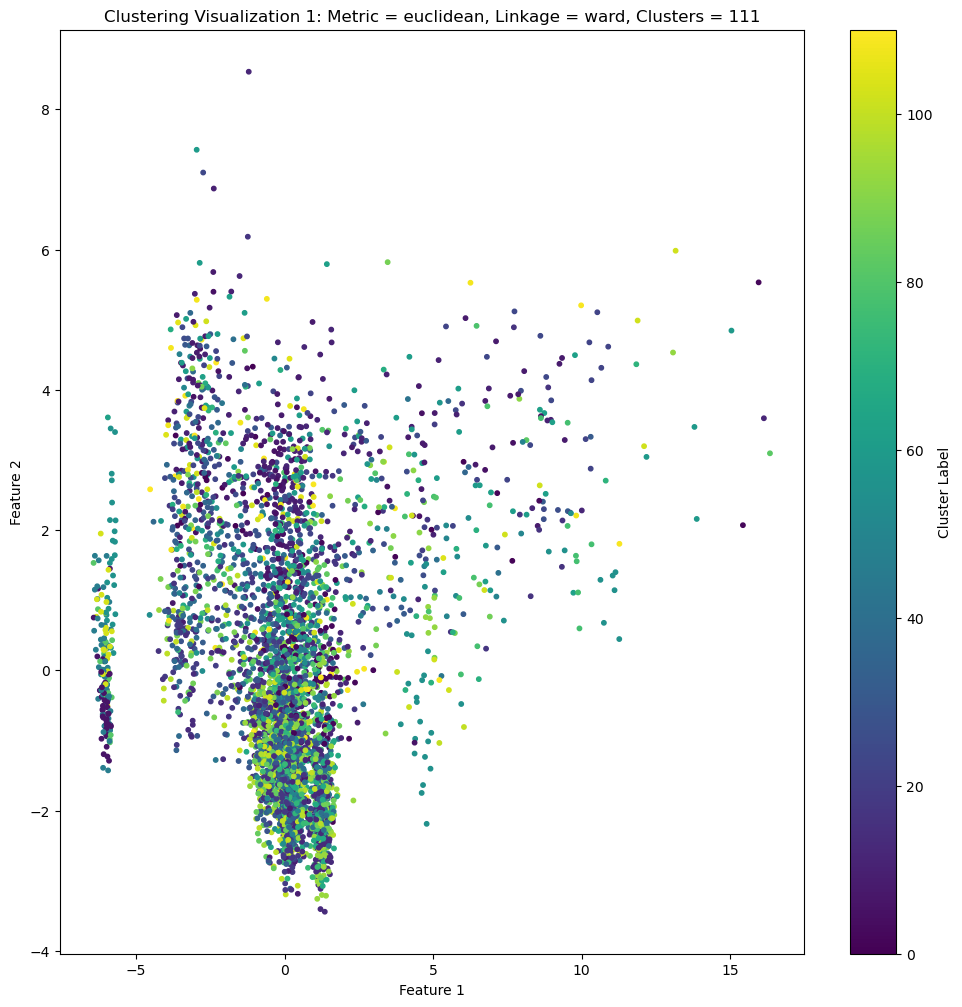

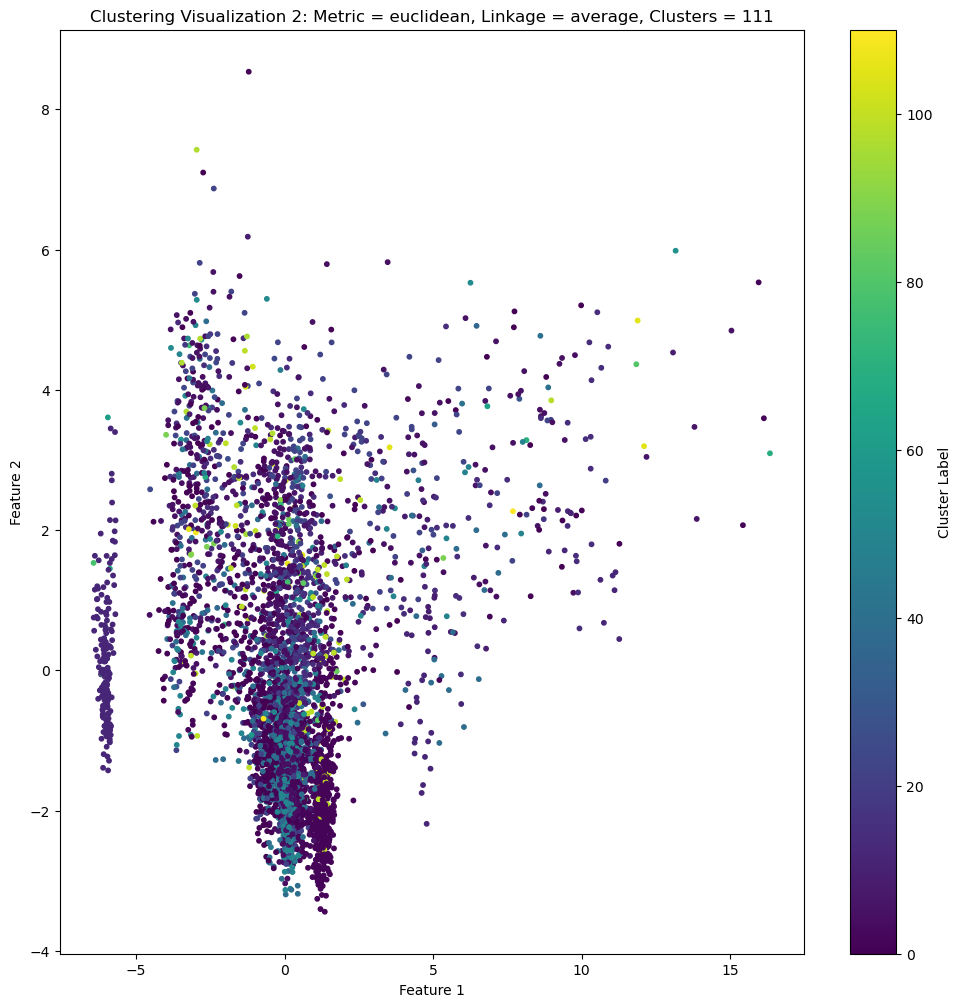

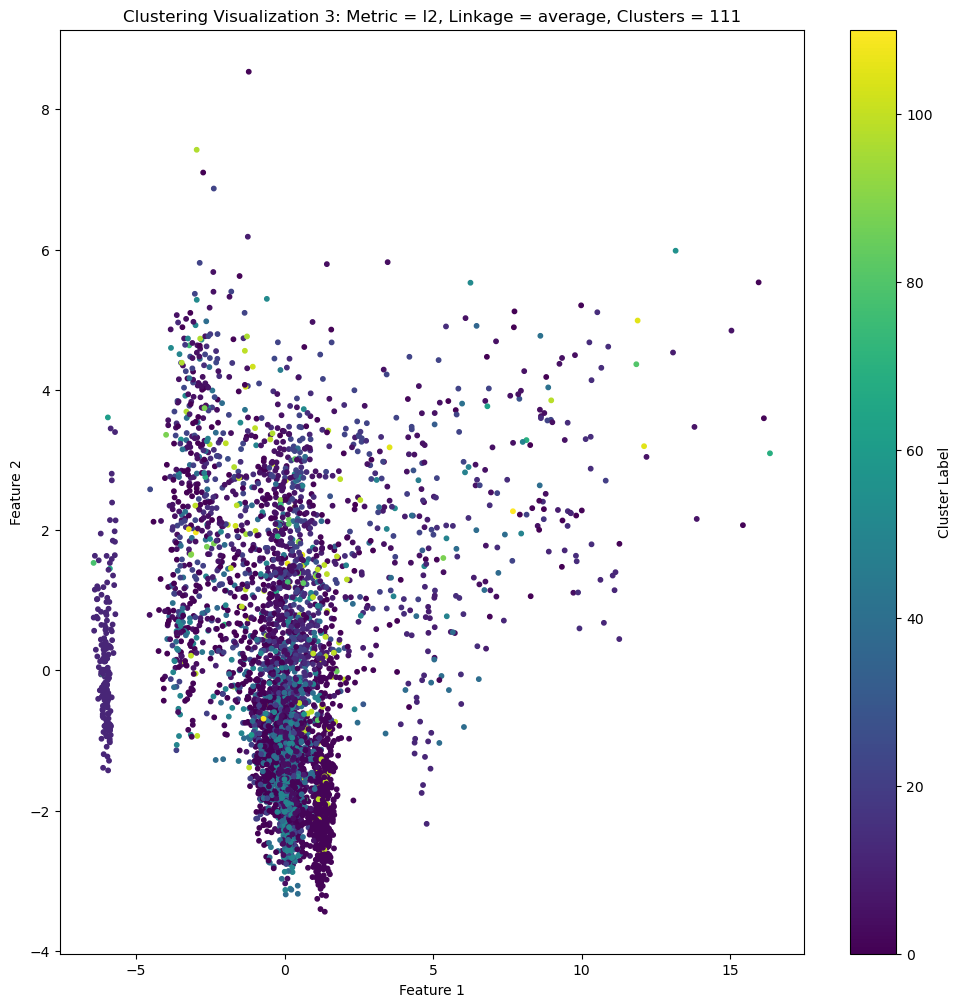

In [25]:
from sklearn.metrics import pairwise_distances

metric = ["euclidean", "l1", "l2", "manhattan", "cosine"]
linkage = ["complete", "average", "single"]
res = []

for i in metric:
    for j in linkage:
        for g in samples:
            hc_comp = AgglomerativeClustering (n_clusters=g,
                                            metric=i,
                                            linkage=j)
            hc_comp.fit(X)
            res.append([i, j, adjusted_rand_score(data['Target'],hc_comp.labels_)])

distance_matrix = pairwise_distances(X, metric='euclidean')

metric = ["precomputed"]  
linkage = ["complete", "average", "single"]

for i in metric:
    for j in linkage:
        for g in samples:
            hc_comp = AgglomerativeClustering(
                n_clusters=g,
                metric=i,
                linkage=j
            )
            hc_comp.fit(distance_matrix)
            res.append([i, j, adjusted_rand_score(data['Target'],hc_comp.labels_)])

for g in samples:
    hc_comp = AgglomerativeClustering (n_clusters=g)
    hc_comp.fit(X)
    res.append(["euclidean", "ward", adjusted_rand_score(data['Target'],hc_comp.labels_)])

best_result = max(res, key=lambda x: x[2])
print("Best result:")
print("Metric: %s, Linkage: %s, Adjusted Rand Index: %.4f" % (best_result[0], best_result[1], best_result[2]))

sorted_res = sorted(res, key=lambda x: x[2], reverse=True)

for rank, (metric, linkage, _) in enumerate(sorted_res[:3]):  
    hc_comp = AgglomerativeClustering(n_clusters=g, metric=metric, linkage=linkage)
    hc_comp.fit(X)

    plt.figure(figsize=(12, 12))
    plt.scatter(scores[:,0], scores[:,1], c=hc_comp.labels_, cmap='viridis', s=10, marker='o')
    plt.title(f'Clustering Visualization {rank+1}: Metric = {metric}, Linkage = {linkage}, Clusters = {g}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.show()


#### As can be seen from the graphs, euclidean ward hierarchical clustering seems to be the best. Along with 111 clusters seemingly showing the best results. Additionally the first graph (best graph) is the most visually discernible graph among the three best results